# NB2.2C Linear Regression Challenge

The Diabetes Dataset includes ten baseline varibles obtained from 442 diabetes patients and the variable of interest which is a quantitative measure of disease progression one year after baseline. 

The variables included are: 
* age: age in years.
* sex.
* bmi: body mass index.
* bp: average blood pressure.
* s1: tc, T-Cells (a type of white blood cells).
* s2: ldl, low-density lipoproteins.
* s3: hdl, high-density lipoproteins.
* s4: tch, thyroid stimulating hormone.
* s5: ltg, lamotrigine.
* s6: glu, blood sugar level.

You can load this dataset by using `sklearn.datasets.load_diabetes()` [[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)]. The 10 feature variables have been mean centered and scaled by the standard deviation.  

In this study case, you must the following phases according to the Cross-Industry Standard Process for Data Mining:
* Data Understanding.
* Data Processing
* Modelling

The main goal is to create the best linear model that fits the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


UsageError: Line magic function `%` not found.


## 1. Data Understanding

**T1** Include in this section, the analysis corresponding to the **Data Understanding**. You can include more cells in case you need it. At the end, write a summary of the findings.

In [3]:
#here it is  load the datatset with load_diabetes from the sklearn dataset which contains 10 attributes 
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
#what the dataframe has into
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
# New dataFrame with all diabetes_data's data.
df = pd.DataFrame( diabetes.data, columns = diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
#here print the keys age, sex, bmi, bp, s1, s2, s3, s4, s5 and s6 with  the independet variable disease progression
print('\nData Set Characteristics:\n')

print("-Data Frame keys: ",df.keys())
print (f"-Number of Instances/Rows: {df.shape[0]}")
print (f"-Number of Attributes/Columns: {df.shape[1]}")
print(f"-Duplicated values:  {df.duplicated().sum()}")


Data Set Characteristics:

-Data Frame keys:  Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
-Number of Instances/Rows: 442
-Number of Attributes/Columns: 10
-Duplicated values:  0


In [7]:
#we can see the data types for the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
#Checking if there are Null values 
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [9]:
#Check if there are NaN values, that show that there are not found missing values 
df.isna().sum()


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

The following 10 features variables was scaled by the standard desviation times n_samples, so let´s prove it...

In [10]:
#in here we calculate the sum per each column rounded by two 
print('\nNote: The sum of squares of each column totals 1\n')

print('1)  ','age --------------------------->', (df.age * df.age).sum().round(2))
print('2)  ','sex --------------------------->', (df.sex * df.sex).sum().round(2))
print('3)  ','s1 ---------------------------->', (df.s1 * df.s1).sum().round(2))
print('4)  ','s2 ---------------------------->', (df.s2 * df.s2).sum().round(2))
print('5)  ','s3 ---------------------------->', (df.s3 * df.s3).sum().round(2))
print('6)  ','s4 ---------------------------->', (df.s4 * df.s4).sum().round(2))
print('7)  ','s5 ---------------------------->', (df.s5 * df.s5).sum().round(2))
print('8)  ','s6 ---------------------------->', (df.s6 * df.s6).sum().round(2))


Note: The sum of squares of each column totals 1

1)   age ---------------------------> 1.0
2)   sex ---------------------------> 1.0
3)   s1 ----------------------------> 1.0
4)   s2 ----------------------------> 1.0
5)   s3 ----------------------------> 1.0
6)   s4 ----------------------------> 1.0
7)   s5 ----------------------------> 1.0
8)   s6 ----------------------------> 1.0


In [11]:
#we declare the targer variable which is disease_progression 
df['disease_progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<Figure size 864x720 with 0 Axes>

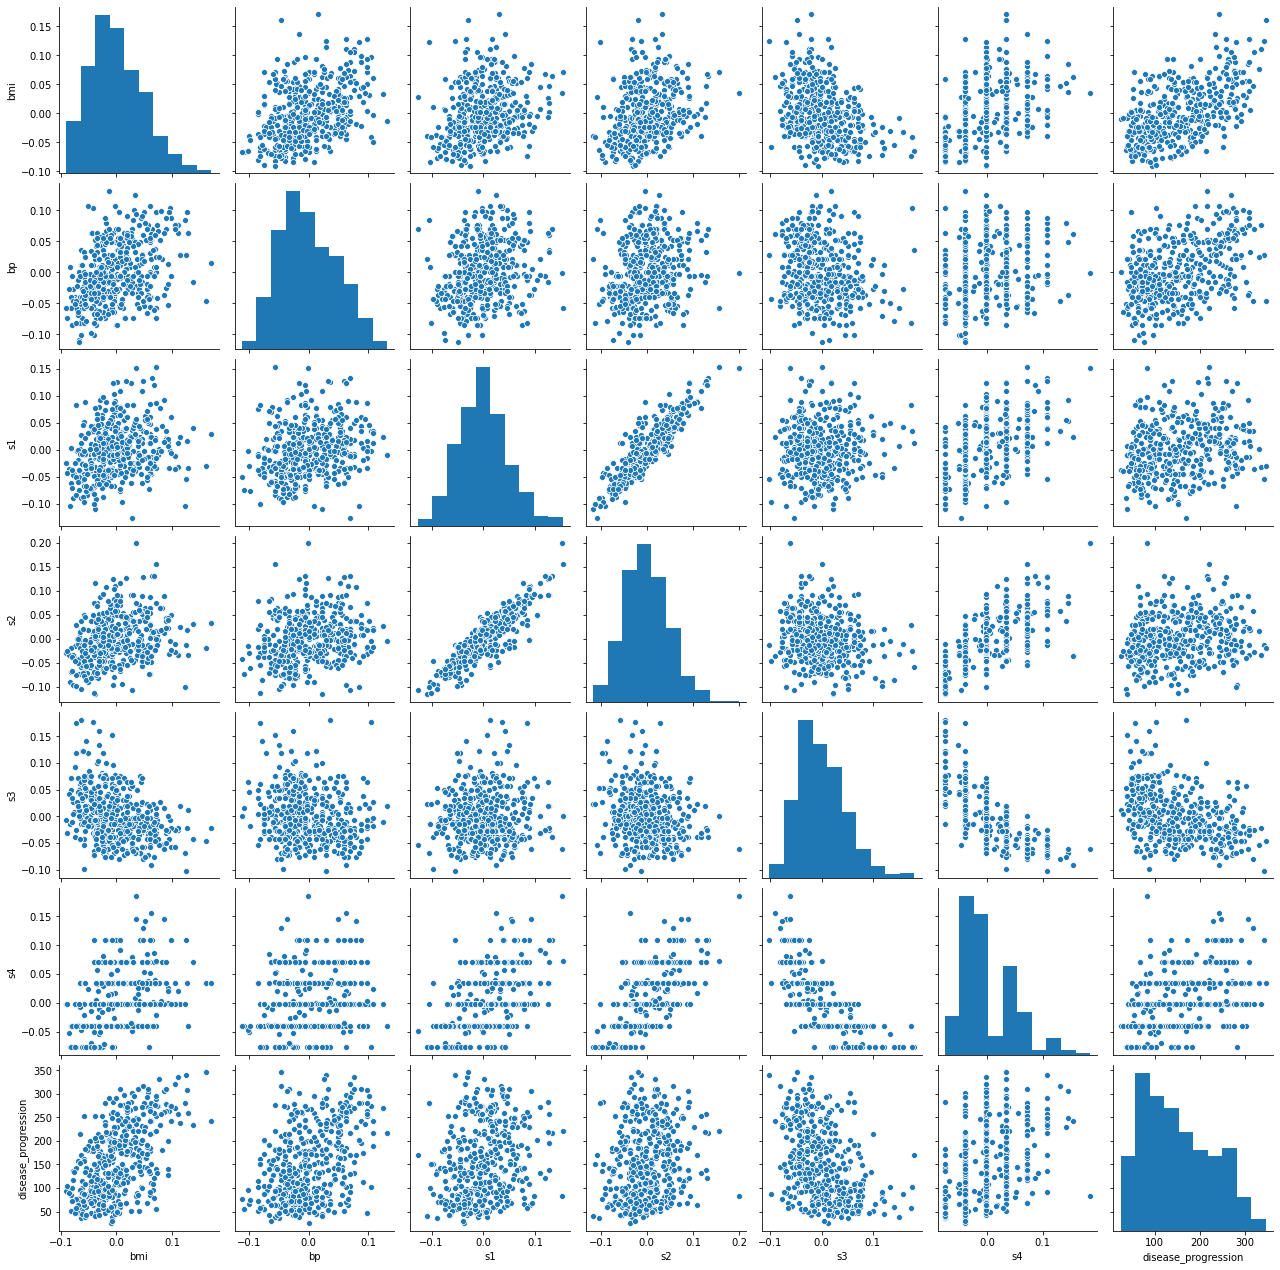

In [12]:
#with this plots we can see the dispersion from all the varaibles of the diabetes set, and we can see that there are two graphs which have less sparsed data 
plt.figure(figsize=(12,10))
sns.pairplot(df[['bmi','bp','s1','s2','s3','s4','disease_progression']])
plt.show()

## 2. Data Processing

**T2** Include in this section, the analysis corresponding to the **Data Processing**. You can include more cells in case you need it. At the end, write a summary of the findings.

In [13]:
# Our objective is to predict How much does the glucose level impact the progression of the disease.

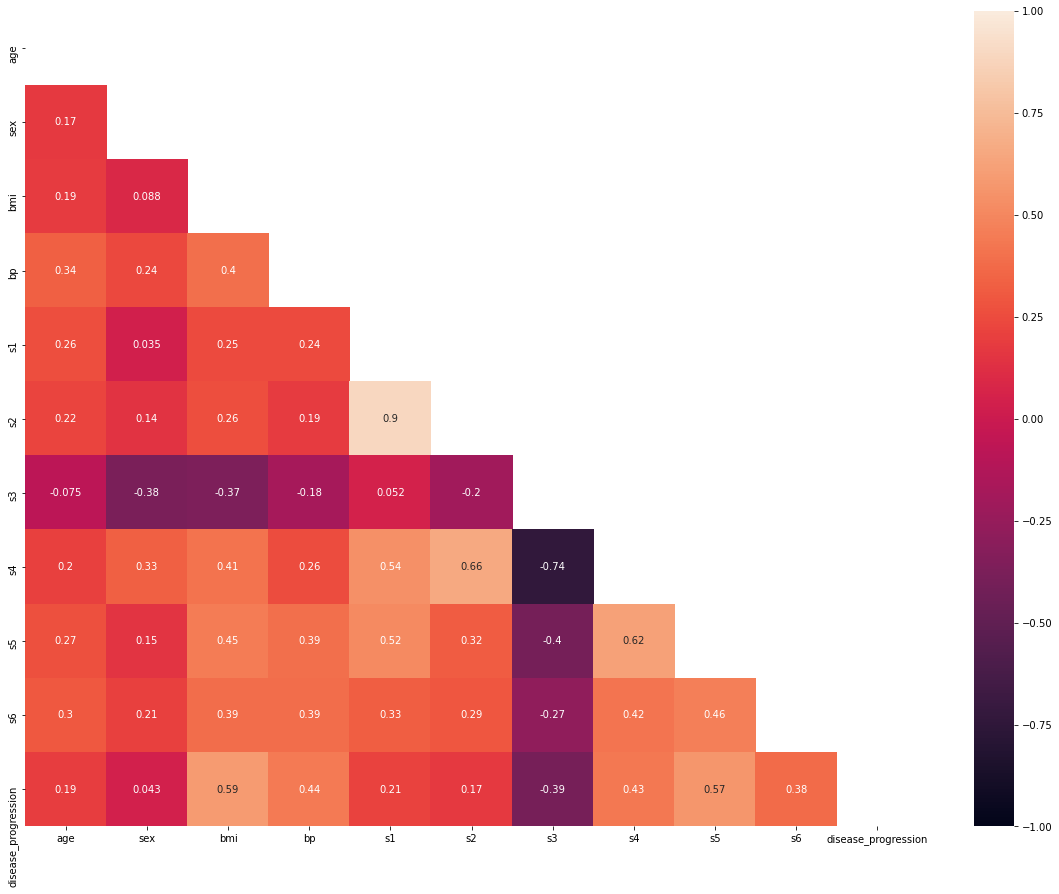

In [14]:
#Setting the size of the map
plt.rcParams['figure.figsize'] = (20,15)


# Correlation Matrix of the whole data set, so we can see the relationship between all the variables. 
correlation_matrix =df.corr()
#plt.show()

# Heatmap to show the correlation for all the variables 
mask = np.zeros_like(correlation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, vmax = 1.0, vmin = -1.0, annot = True, mask = mask)
plt.show()

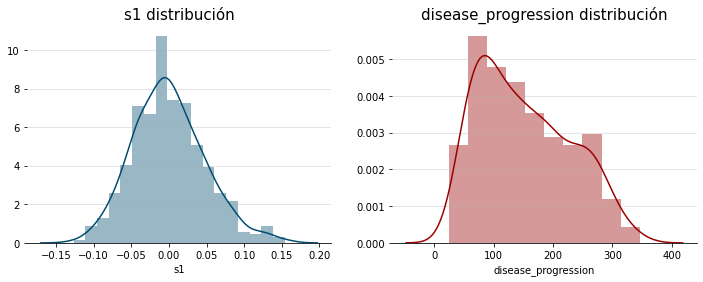

In [15]:
#with these graphs we show the distribution for the s1 variable vs the independet variable which is disease_progression 
top2 = ['s1','disease_progression']
colors = ['#004c70', '#990000']
 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
for i, col in enumerate(top2):
    sns.distplot(df[col], color = colors[i], ax = ax[i])
    ax[i].set_title(f'{col} distribución', fontsize = 15)
 
for s in ['top','left','right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
    ax[0].grid(axis='y', linestyle='-', alpha=0.4); ax[1].grid(axis='y', linestyle='-', alpha=0.4)

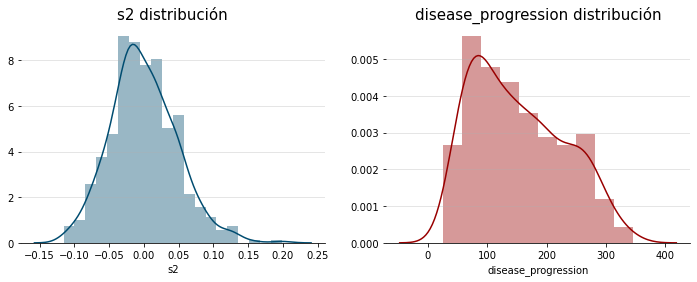

In [16]:
#with these graphs we show the distribution for the s2 variable vs the independet variable which is disease_progression by using a lit for the two variables 
top2 = ['s2','disease_progression']
colors = ['#004c70', '#990000']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
for i, col in enumerate(top2):
    sns.distplot(df[col], color = colors[i], ax = ax[i])
    ax[i].set_title(f'{col} distribución', fontsize = 15)
 
for s in ['top','left','right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
    ax[0].grid(axis='y', linestyle='-', alpha=0.4); ax[1].grid(axis='y', linestyle='-', alpha=0.4)

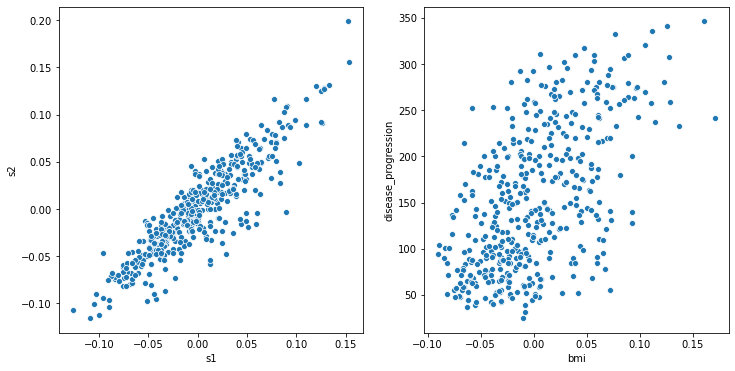

In [17]:
#in this part we can see the relationship between the variables s1, s2 and bm1 with disease_prediction
fig, ax = plt.subplots(1,2 , figsize = (12,6))
sns.scatterplot("s1","s2", data = df, ax = ax[0])
sns.scatterplot("bmi","disease_progression", data = df, ax = ax[1])

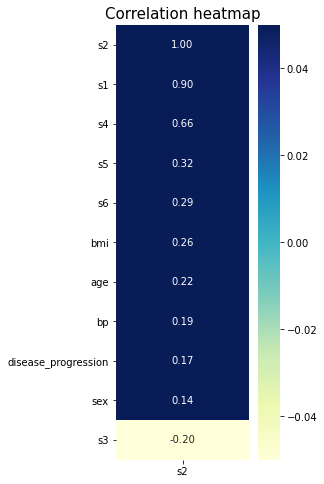

In [18]:
#show the correlation heatmap for all the independent and dependent varaibles in descending order with respect to s2 
corr = pd.DataFrame(df.corr()['s2'].sort_values(ascending = False))#.rename(columns = {'disease_progression':'low-density lipoproteins.'})
plt.figure(figsize = (3,8))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, vmax = 0.05, cmap = 'YlGnBu')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

In [19]:
#then we show the dataframe for the variables s1, s2, bmi and disease_progression 
data  = pd.DataFrame([df['s1'],df['s2'],df['bmi'],df['disease_progression']]).T
data.head()

,s1,s2,bmi,disease_progression
0,-0.044223,-0.034821,0.061696,151.0
1,-0.008449,-0.019163,-0.051474,75.0
2,-0.045599,-0.034194,0.044451,141.0
3,0.012191,0.024991,-0.011595,206.0
4,0.003935,0.015596,-0.036385,135.0


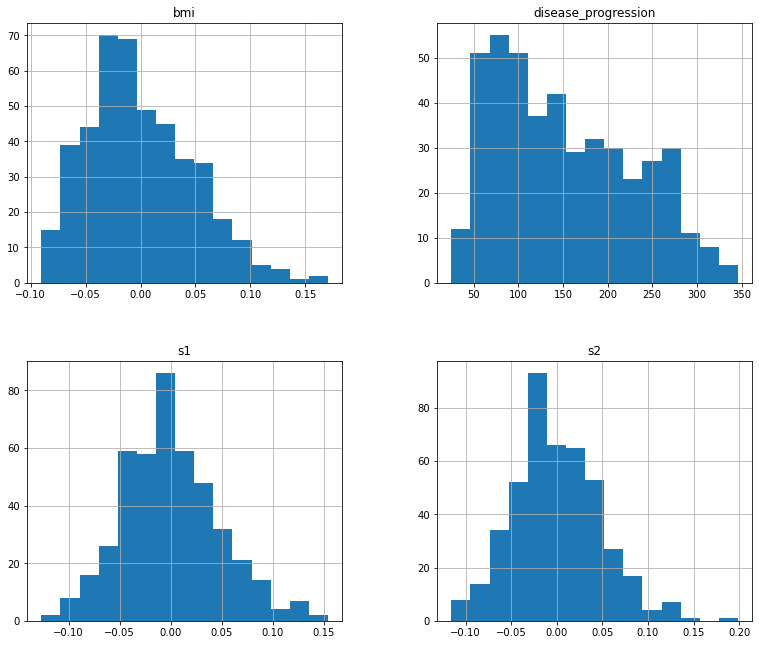

In [20]:
#we can see that all the variables have a standard deviation in contrast with the disease_progression varaible 
data.hist(figsize=(13, 11), bins= 15)
plt.show()

## 3. Modelling

**T3** Include in this section, the analysis corresponding to the **Modelling**. You can include more cells in case you need it. At the end, write a summary of the findings.

In [21]:
#we divide the dataset for features and the target for the multiple linear regression
x = data.iloc[:,: -1] #features
y = data.iloc[:,-1] #target


In [22]:
#split the x and y with 80% for the training data set and 20% for the test data set 
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #model creation

lr.fit(x_train,y_train) #creation of the fit for the model

prediction = lr.predict(x_train) #do the prediction of the data

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

#print the RMSE for the Model 1 
rmse_train = np.sqrt(mean_squared_error(y_train, prediction))
print("RMSE = {}".format(rmse_train))

# print the R2 for the Model 1 
r2_train = r2_score(y_train, prediction)
print("R2 = {}".format(r2_train))

RMSE = 60.76998935404496
R2 = 0.3065016858538344


In [25]:
#get the intercept for the linear model 
intercept = lr.intercept_

#get the coeffcients for the linear model 
coefficients = lr.coef_

print("w0 = {:5.2f}".format(intercept))

for i in range(1,len(coefficients) + 1):
    print("w{:d} = {:5.2f}".format(i, coefficients[i-1]))

w0 = 151.35
w1 = 356.78
w2 = -299.64
w3 = 850.03


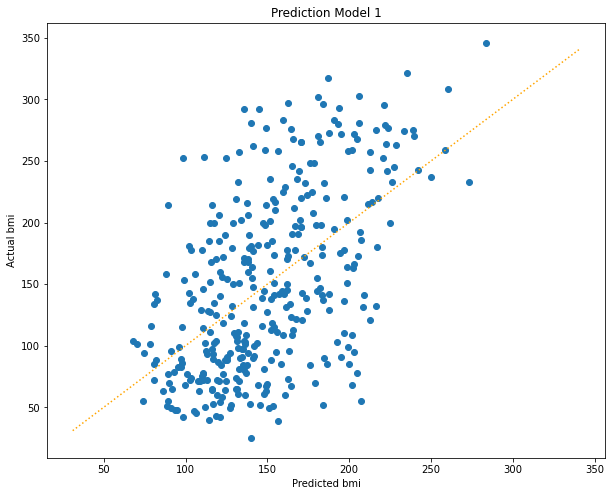

In [26]:
# Prediction vs Actual Value
#in this model it can be seen that the data is not so well adjusted compared to the second model
fig, ax = plt.subplots(figsize = (10,8))

ax.set_title("Prediction Model 1")
ax.set_xlabel("Predicted bmi")
ax.set_ylabel("Actual bmi")


ax.scatter(prediction, y_train)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ":", color = 'orange')
plt.show()

In [27]:
data.head()

,s1,s2,bmi,disease_progression
0,-0.044223,-0.034821,0.061696,151.0
1,-0.008449,-0.019163,-0.051474,75.0
2,-0.045599,-0.034194,0.044451,141.0
3,0.012191,0.024991,-0.011595,206.0
4,0.003935,0.015596,-0.036385,135.0


# MODELO 2

For the  model 2 we will apply standarized function for all the variables for the data set 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes as import_data
diabetes_raw = import_data()
diabetes_raw.keys()

#  Standardize features (input variables) by removing the mean and scaling to unit variance
scaler = StandardScaler()
df[diabetes_raw.feature_names] = scaler.fit_transform(df[diabetes_raw.feature_names])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [29]:
#show the standarized data for the variables s1, s2 , bmi and disease_progression
df2  = pd.DataFrame([df['s1'],df['s2'],df['bmi'],df['disease_progression']]).T
df2.head()

,s1,s2,bmi,disease_progression
0,-0.929746,-0.732065,1.297088,151.0
1,-0.177624,-0.402886,-1.082180,75.0
2,-0.958674,-0.718897,0.934533,141.0
3,0.256292,0.525397,-0.243771,206.0
4,0.082726,0.327890,-0.764944,135.0


In [30]:
# Train and Test Set with 80% for the training set and 20% for the testing set 
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,: -1], df2['disease_progression'], train_size = .80)

In [31]:
lr2 = LinearRegression() #model creation
lr2.fit(x_train,y_train) #creation of the fit for the model
prediction2 =lr2.predict(x_train) #do the prediction of the data

In [32]:
#get the RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, prediction2))
print("RMSE = {}".format(rmse_train))

# get the R2
r2_train = r2_score(y_train, prediction2)
print("R2 = {}".format(r2_train))

RMSE = 61.26630536048934
R2 = 0.3453179142736009


In [33]:
#obtain the intercept2 (intersection)  for the second model 2
intercept2 = lr.intercept_

#obtain the coefficients for the model 2 
coefficients2 = lr.coef_

print("w0 = {:5.2f}".format(intercept2))

for i in range(1,len(coefficients2) + 1):
    print("w{:d} = {:5.2f}".format(i, coefficients2[i-1]))

w0 = 151.35
w1 = 356.78
w2 = -299.64
w3 = 850.03


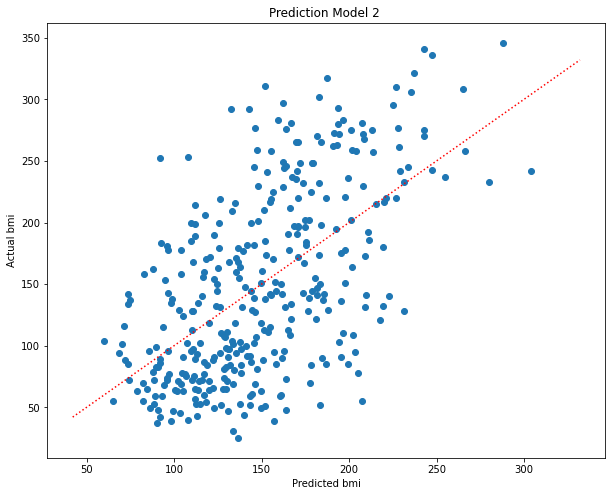

In [34]:
# Prediction vs Actual Value
#we can observe the the line get best fitted to the data due to we apply the logaritm function 
fig, ax = plt.subplots(figsize = (10,8))

ax.set_title("Prediction Model 2 ")
ax.set_xlabel("Predicted bmi")
ax.set_ylabel("Actual bmi")


ax.scatter(prediction2, y_train)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ":", color = 'red')
plt.show()

# ​
T4 Linear Regression Models consider the following assumptions:

Linearity.
Multivariate Normality.
No or little multicollinerity.
Homoscedasticity.
Independence or No auto-correlation.
Research about each assumption and how to test them. For each of them include:

A description of the assumption and how it can be tested.
Test if your model fulfill all asumptions and include your conclusions.

In [35]:
import matplotlib.pyplot as plt

# •	Linearity
Linearity is the assumption that the relation between an independent and dependent variable is linear. This assumption is especially sensitive to outliers.
The easier way to test linearity is through scatter plots: just by seeing the dots, it is possible to assume linearity if a straight line could be fitted easily to the dots. This is not possible if the dots are very sparse between each other, or if they contour a non-linear shape.


 




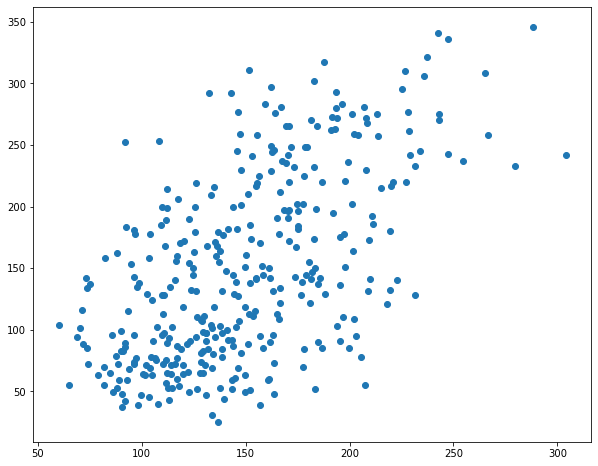

In [36]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(prediction2, y_train)

# In this graph, we can see it is possible to fit a straight line to the dots.
# Therefore, there is linearity. 

# Multivariate normality
Multivariate normality (also called multivariate Gaussian distribution) is the assumption that the residuals of our data are normally distributed.

Just as with linearity, testing for multivariate normality is easier by looking at graphs: after confirming that the data is normally distributed, generate a multi-dimensional graph and confirm that the skewness and kurtosis are consistent with this type of distribution.

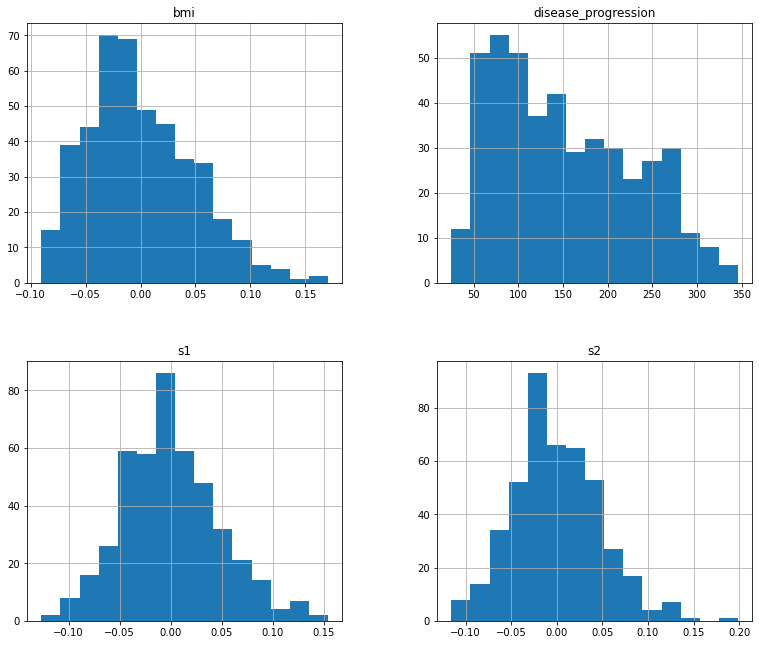

In [46]:
data.hist(figsize=(13, 11), bins= 15)
plt.show()

# We can see normal distributions on our data (Gaussian bells),
# Therefore, we proved multivariate normality.




# No or little multicollinearity
Multicollinearity is the correlation of independent variables with each other. Assuming that there is no (or little) multicollinearity can be explained as assuming that the independent variables are NOT correlated with each other.

One of the most well-known ways to test for multicollinearity is the Variance Inflation Factors (VIF) test: this test identifies correlation between independent variables and the strength of it. Usually, the results of this test start at 1 and have no upper limit; 1 means no correlation, and values higher than 5 indicate critical multicollinearity.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
Xvif = df[['s3', 's4']]
Xvif

 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
vif["features"] = Xvif.columns

 

vif

 

# Following the explanation above:
#   We can see values of 2 for these variables, therefore indicating
#   a very small multicollinearity, but not strong enough for us to
#   assume a real multicollinearity or to take actions about it.
#   Therefore, we assume little multicollinearity.






,VIF Factor,features
0,2.199598,s3
1,2.199598,s4


### Homoscedasticity
Homoscedasticity means ‘same variance’. This term is used to describe that the ‘noise’ or the error term between independent and dependent variables is the same across all the values of the independent variables. This means, we assume there is no heteroscedasticity, or different noise according to the values of the independent variable. 

There are different ways to test this assumption, some of the most common are: plotting a scatterplot and looking for cone shapes or using the Levene’s test (mathematical formula).

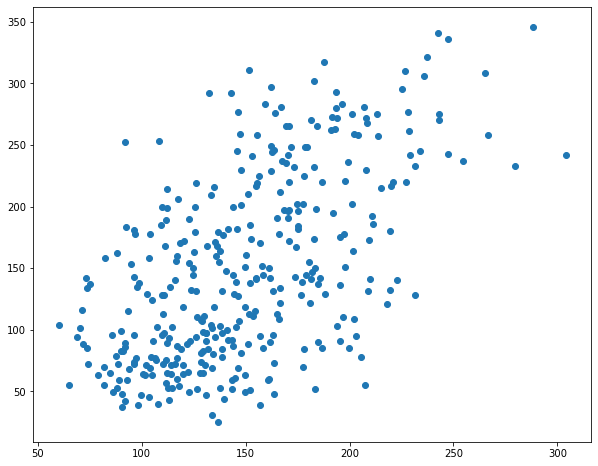

In [47]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(prediction2, y_train)

# Testing with the same graph as the linearity assumption.
# We cannot find any distortion to the scattered points
#   which would suggest a heteroscedasticity distribution,
#   therefore we assume homoscedasticity

# Independence or No autocorrelation

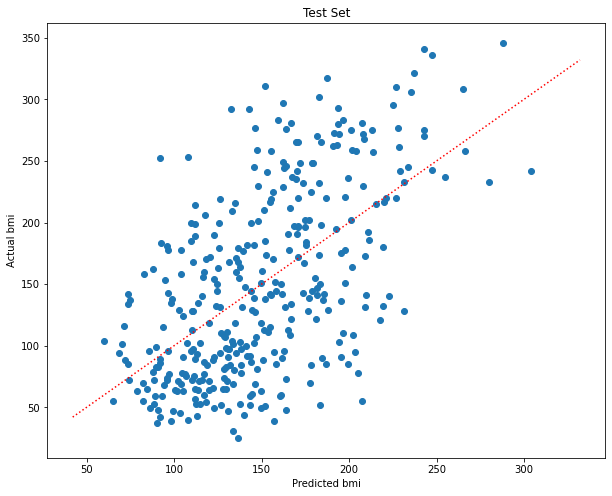

In [48]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("Test Set")
ax.set_xlabel("Predicted bmi")
ax.set_ylabel("Actual bmi")
ax.scatter(prediction2, y_train)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ":", color = 'red')
plt.show()

 

# Following the definition, we can use the real values vs. fitted values plot.
#   Given the distribution of real data vs. the predicted values, we can not
#   identify any strong similarity between residuals.
#   Therefore, we assume no autocorrelation (independence).